In [1]:
import pandas as pd

In [21]:
df = pd.read_csv("sp_index.csv")

In [22]:
#converting the date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [56]:
remove_comma = ['Open', 'High', 'Low', 'Close']

In [57]:
# as there are comma in numberical values so befor changing the datatype need to remove comma
for col in remove_comma:
    df[col] = df[col].str.replace(",", "")

In [58]:
df.describe()

C:\Users\sharu\AppData\Local\Temp\ipykernel_6660\3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Date,Open,High,Low,Close
count,250,250,250,250,250
unique,250,250,248,249,249
top,2022-06-06 00:00:00,4134.72,4159.77,4103.98,4137.64
freq,1,1,2,2,2
first,2022-06-06 00:00:00,NaN,NaN,NaN,NaN
last,2023-06-02 00:00:00,NaN,NaN,NaN,NaN


In [40]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [51]:
convert_dict = {"Open" : float, "High" : float, "Low" : float, "Close" : float, }

In [59]:
#converting the numerical value in float
df = df.astype(convert_dict)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 249 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    250 non-null    datetime64[ns]
 1   Open    250 non-null    float64       
 2   High    250 non-null    float64       
 3   Low     250 non-null    float64       
 4   Close   250 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 11.7 KB


In [62]:
df = df.sort_values(by="Date")

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

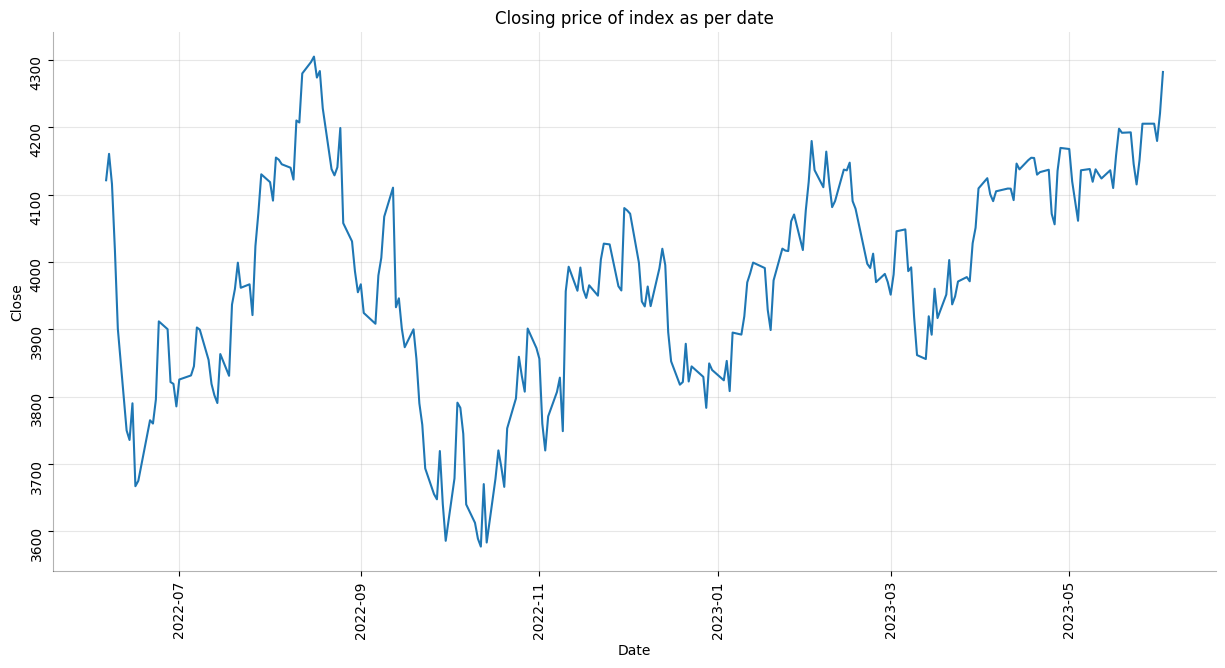

In [75]:
plt.figure(figsize=(15,7))
plt.plot(df["Date"],df["Close"])
plt.tick_params(labelrotation = 90)
plt.xlabel("Date")
plt.ylabel("Close")
plt.grid(axis='both', alpha=.3)
#removing borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)
plt.title("Closing price of index as per date")
plt.show()

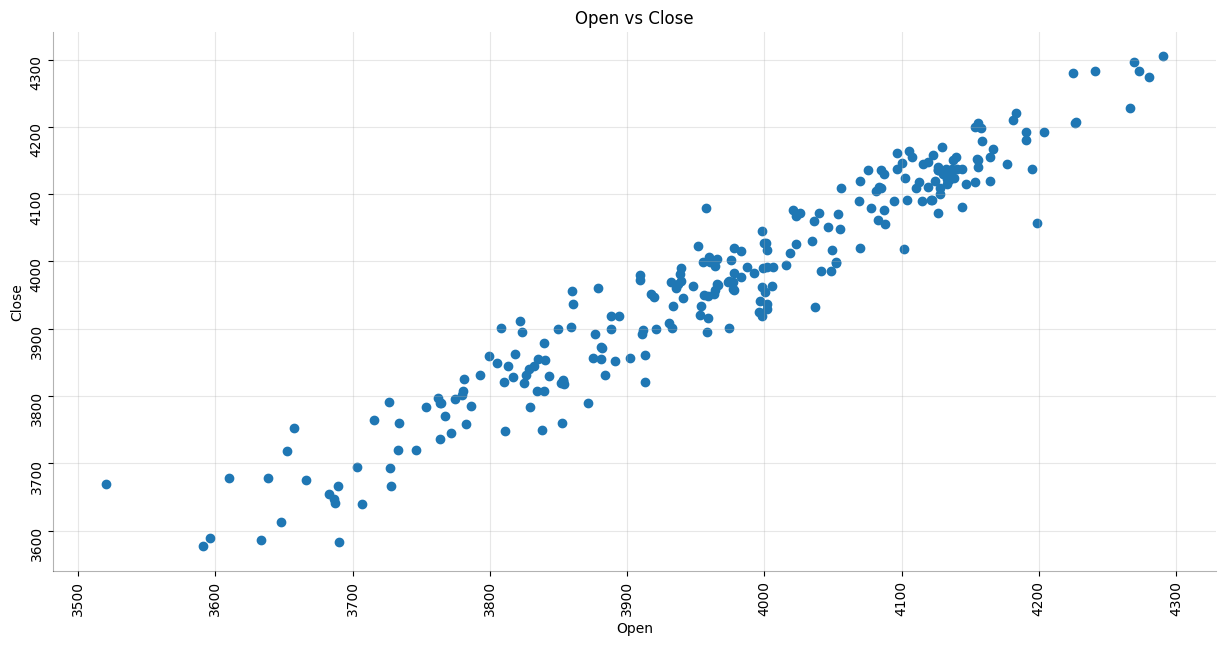

In [76]:
plt.figure(figsize=(15,7))
plt.scatter(df["Open"],df["Close"])
plt.tick_params(labelrotation = 90)
plt.xlabel("Open")
plt.ylabel("Close")
plt.grid(axis='both', alpha=.3)
#removing borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)
plt.title("Open vs Close")
plt.show()

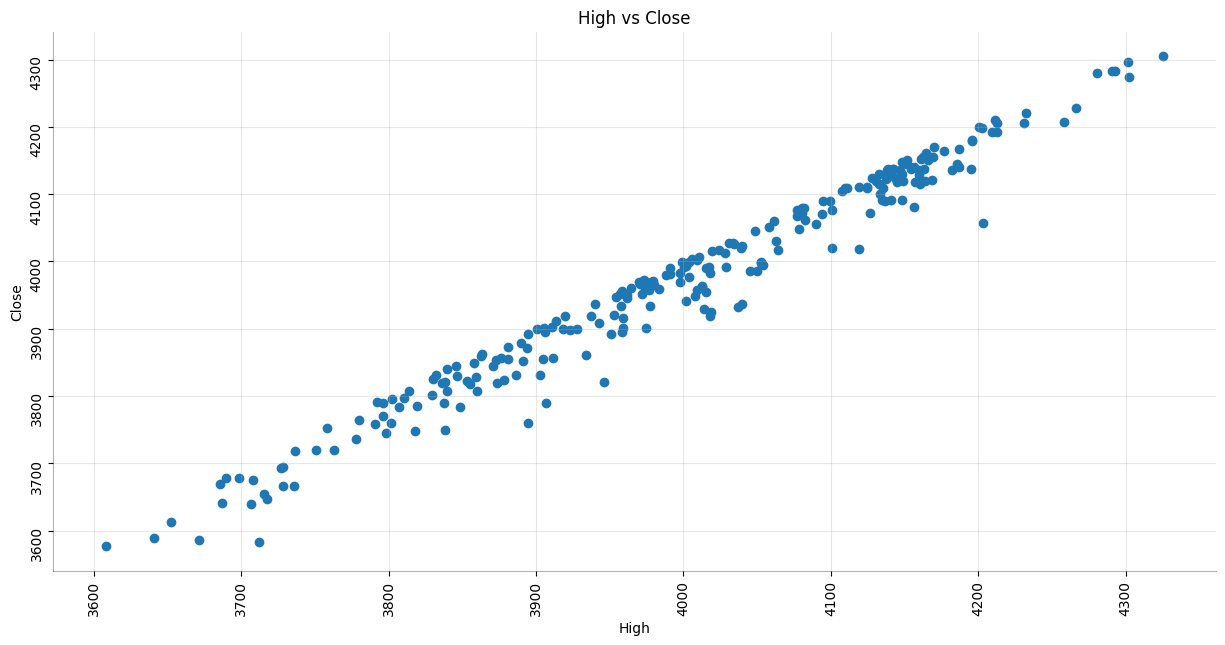

In [77]:
plt.figure(figsize=(15,7))
plt.scatter(df["High"],df["Close"])
plt.tick_params(labelrotation = 90)
plt.xlabel("High")
plt.ylabel("Close")
plt.grid(axis='both', alpha=.3)
#removing borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)
plt.title("High vs Close")
plt.show()

In [80]:
df["Close_pct_change"] = df["Close"].pct_change()

In [81]:
df

,Date,Open,High,Low,Close,Close_pct_change
249,2022-06-06,4134.72,4168.78,4109.18,4121.43,NaN
248,2022-06-07,4096.47,4164.86,4080.19,4160.68,0.009523
247,2022-06-08,4147.12,4160.14,4107.20,4115.77,-0.010794
246,2022-06-09,4101.65,4119.10,4017.17,4017.82,-0.023799
245,2022-06-10,3974.39,3974.39,3900.16,3900.86,-0.029110
...,...,...,...,...,...,...
4,2023-05-26,4155.98,4212.87,4156.16,4205.45,0.013049
3,2023-05-30,4226.71,4231.10,4192.18,4205.52,0.000017
2,2023-05-31,4190.74,4195.44,4166.15,4179.83,-0.006109
1,2023-06-01,4183.03,4232.43,4171.64,4221.02,0.009854


In [82]:
#using rolling methoed to calculate moving average
df["MA_9"] = df["Close"].rolling(window = 9).mean()
df["MA_21"] = df["Close"].rolling(window = 21).mean()

In [83]:
df

,Date,Open,High,Low,Close,Close_pct_change,MA_9,MA_21
249,2022-06-06,4134.72,4168.78,4109.18,4121.43,NaN,NaN,NaN
248,2022-06-07,4096.47,4164.86,4080.19,4160.68,0.009523,NaN,NaN
247,2022-06-08,4147.12,4160.14,4107.20,4115.77,-0.010794,NaN,NaN
246,2022-06-09,4101.65,4119.10,4017.17,4017.82,-0.023799,NaN,NaN
245,2022-06-10,3974.39,3974.39,3900.16,3900.86,-0.029110,NaN,NaN
...,...,...,...,...,...,...,...,...
4,2023-05-26,4155.98,4212.87,4156.16,4205.45,0.013049,4163.208889,4142.854286
3,2023-05-30,4226.71,4231.10,4192.18,4205.52,0.000017,4173.833333,4144.570476
2,2023-05-31,4190.74,4195.44,4166.15,4179.83,-0.006109,4176.173333,4145.140000
1,2023-06-01,4183.03,4232.43,4171.64,4221.02,0.009854,4178.725556,4149.970476


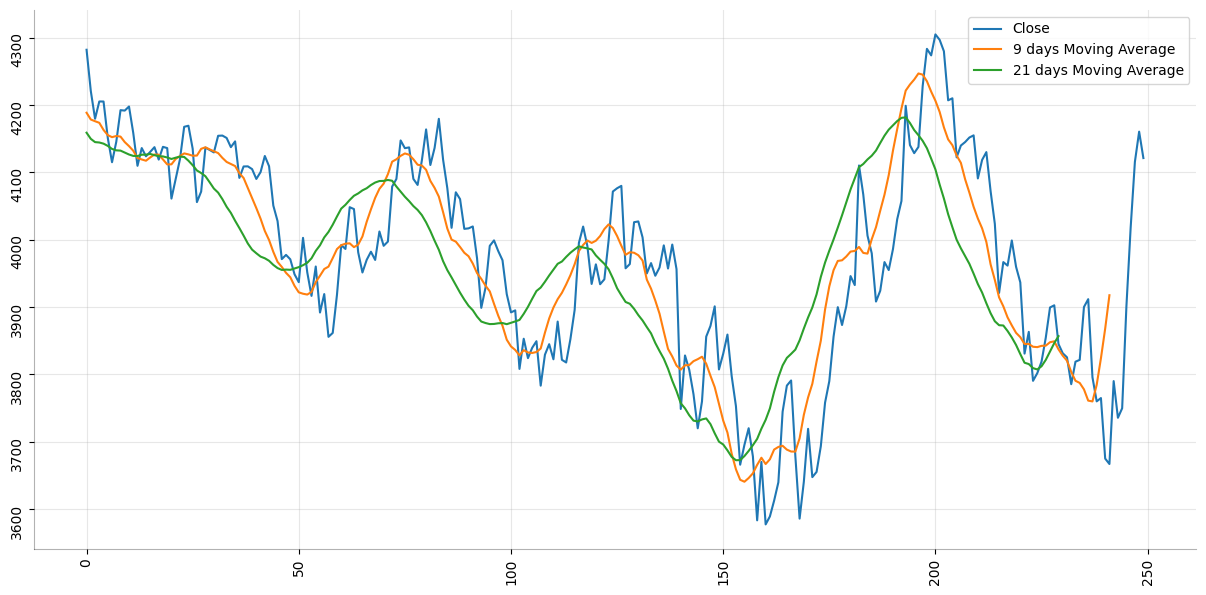

In [85]:
plt.figure(figsize=(15,7))
plt.plot(df["Close"], label = "Close")
plt.plot(df["MA_9"], label = "9 days Moving Average")
plt.plot(df["MA_21"], label = "21 days Moving Average")
plt.tick_params(labelrotation = 90)
plt.legend(loc = 'upper right')
plt.grid(axis='both', alpha=.3)
#removing borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

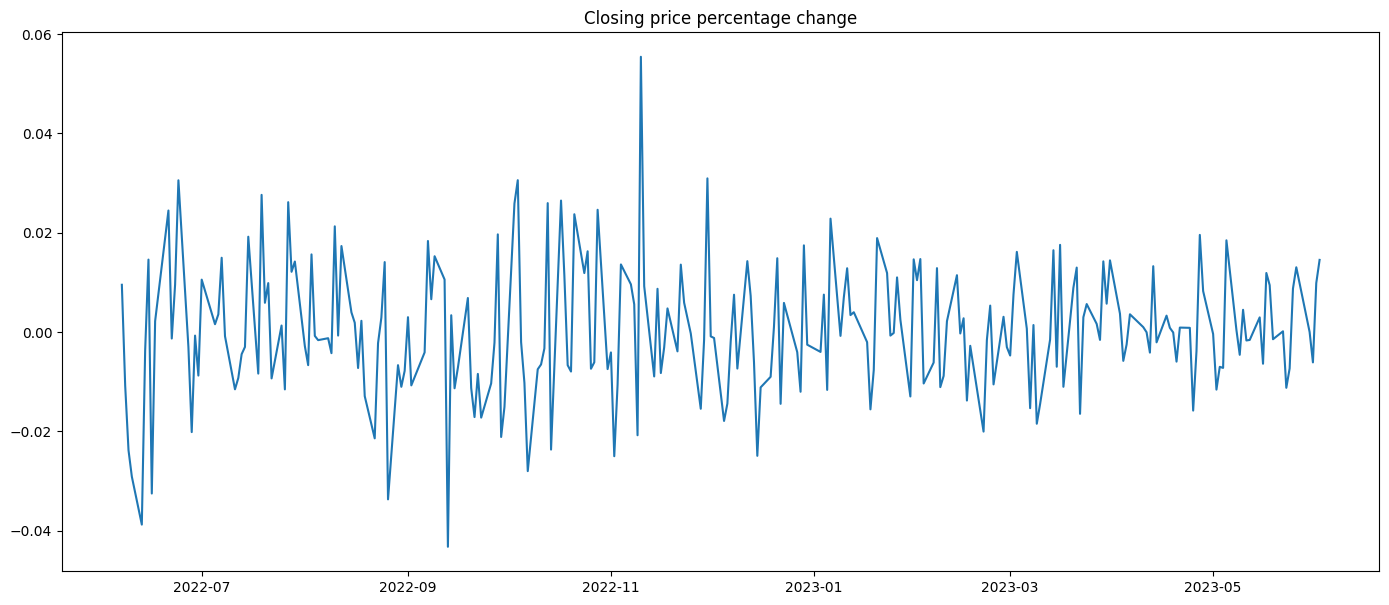

In [88]:
plt.figure(figsize = (17,7))
plt.plot(df["Date"], df["Close_pct_change"])
plt.title("Closing price percentage change")
plt.show